# Laboration 2 
Classify data as either Pikachu or Pichu. Run each cell in order, as they are dependent on the previous ones. 

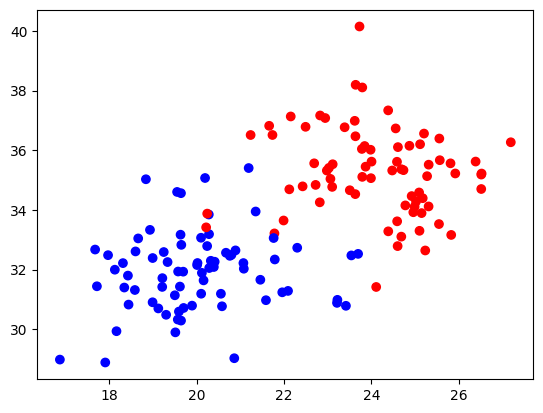

In [18]:
import matplotlib.pyplot as plt
import csv

file_path = "Data\\datapoints.txt"
data_points = []

with open(file_path, "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        if len(row) == 3:
            width = float(row[0])
            height = float(row[1])
            label = int(row[2])
            data_points.append([width, height, label])

colors = ['red' if point[2] > 0 else 'blue' for point in data_points]
plt.scatter([x[0] for x in data_points], [y[1] for y in data_points], c=colors)


## Read test data


In [19]:
test_cases = []

with open("Data\\testpoints.txt", "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        if len(row) == 2:
            width = float(row[0][4:])
            height = float(row[1][:-1].strip())
            test_cases.append([width, height])

print(f"Test cases: {test_cases}")


Test cases: [[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


## Beräkna avstånd mellan punkterna 

In [20]:
import math

def calc_distance(x1: float, y1: float, x2: float, y2: float):
    '''Calculates the distance between two points in a two-dimensional coordinate system.

    Args:
        x1 (float): The x-coordinate of the first point.
        y1 (float): The y-coordinate of the first point.
        x2 (float): The x-coordinate of the second point.
        y2 (float): The y-coordinate of the second point.

    Returns:
        float: The distance between the two points.
    '''
    # Used Bing or Chat-GPT for writing the docstrings
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def nearest_neighbor(test_point, data_points):
    ''' Classifies a test point based on the nearest data point.

    Args:
        test_point (tuple): The coordinates of the test point (x, y).
        data_points (list): List of data points, each represented as (x, y, classification).

    Returns:
        str: The classification result for the test point.
    '''
    smallest_distance = float('inf')

    for data_point in data_points:
        distance = calc_distance(data_point[0], data_point[1], test_point[0], test_point[1])
        if distance < smallest_distance:
            smallest_distance = distance
            closest_class = data_point[2]

    return "Pikachu" if closest_class == 1 else "Pichu"

classification_list = []

for i, test_case in enumerate(test_cases):
    classification_list.append(nearest_neighbor(test_case,data_points))
    print(f"Sample with (width, height): ({test_case[0]}, {test_case[1]}) classified as {classification_list[i]}")

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


## Uppgifter

Gör dessa uppgifter när du har klassificerat testdatan korrekt.

1.  Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.

In [21]:
# Task 1 
def input_test_case() -> tuple:
    """ Prompt the user to enter a test case in the format 'width, height'.

    Returns:
        tuple: A tuple containing the width and height entered by the user.
    """    
    entered_string = input("Enter test case in format 'width, height', e.g. '22.3, 30.0': ").strip()
    try:
        entered_test_case = eval(entered_string)
    except:
        print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
        return None
    try:
        if len(entered_test_case) != 2:
            print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
    except:
        print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
        return None
    try:
        if len(entered_test_case) != 2:
            print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
            return None
    except:
        print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
        return None

    return entered_test_case

# Compare entered test case to the dataset using nearest neighbor
entered_test_case = input_test_case()
if entered_test_case:
    print(f"Sample with (width, height): ({entered_test_case[0]}, {entered_test_case[1]}) classified as {nearest_neighbor(entered_test_case, data_points)}")

Sample with (width, height): (22, 30) classified as Pichu


2.  Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.

In [22]:
# Task 2

import sys

def k_nearest_neighbor(test_point, data_points, k: int):
    ''' Classifies a test point based on the k nearest data points.

    Args:
        test_point (tuple): The coordinates of the test point (x, y).
        data_points (list): List of data points, each represented as (x, y, classification).
        k (int): The number of closest neighbours to compare the test point to.

    Returns:
        str: The classification result for the test point, being the majority of the k closest neighbors.
    '''
    new_list = data_points.copy()

    for i, data_point in enumerate(new_list):
        new_list[i].append(calc_distance(data_point[0], data_point[1], test_point[0], test_point[1]))
    
    #Googled how to sort a list using a specific field as key
    sorted_data = sorted(new_list, key=lambda x: x[-1])
    
    pikachu = 0
    pichu = 0

    for row in sorted_data[:k]:
        if row[2] == 1:
            pikachu +=1
        else:
            pichu +=1

    if pikachu > pichu:
        return "Pikachu"
    elif pikachu < pichu:
        return "Pichu"
    else:
        # Asked Bing how to print to stderr in Python
        print("k_nearest_neighbor(): Use an odd k number to not get a draw", file=sys.stderr)
        return None

# Compare entered test case to the dataset using k nearest neighbor
entered_test_case = input_test_case()
print(f"Sample with (width, height): ({entered_test_case[0]}, {entered_test_case[1]}) classified as {k_nearest_neighbor(entered_test_case,data_points,10)}")


Sample with (width, height): (22, 30) classified as Pichu


## Bonusuppgifter (VG, frivilliga)
3. Dela in ursprungsdatan slumpmässigt så att:
* 100 är träningsdata (50 Pikachu, 50 Pichu)
* 50 är testdata (25 Pikachu, 25 Pichu)



In [24]:
import random

def get_training_and_test_data():
    """ Randomly separates a dataset of 150 items (75 of each class) into training and test data.

    Returns:
        tuple: A tuple containing two lists: (training_data, test_data)
        - training_data (list): A list of training data points with 50 from each class.
        - test_data (list): A list of test data points with the remaining data points.

    Example:
        training_data, test_data = get_training_and_test_data()
    """
    # Separate data points into two lists based on their labels
    pikachu_data = [[d[0],d[1],d[2]] for d in data_points if d[2] == 1]
    pichu_data = [[d[0],d[1],d[2]] for d in data_points if d[2] == 0]

    # Shuffle the data points for each class randomly
    random.shuffle(pikachu_data)
    random.shuffle(pichu_data)

    training_data = pikachu_data[:50] + pichu_data[:50]
    test_data = pikachu_data[50:] + pichu_data[50:]
    
    random.shuffle(training_data)
    random.shuffle(test_data)

    return training_data, test_data

get_training_and_test_data()

([[24.004087953898246, 35.618803262029324, 1],
  [21.78020031891186, 33.213397759738264, 1],
  [18.836400960218388, 35.028108243261656, 0],
  [23.062887108583702, 35.04075442599907, 1],
  [24.47796159427686, 35.32146634770389, 1],
  [20.670175582205307, 32.56517816055985, 0],
  [20.323269906838078, 32.29574812465895, 0],
  [20.216002852334192, 33.41610156154373, 1],
  [22.943474306364404, 37.07911595862419, 1],
  [16.866105280907732, 28.984730409305136, 0],
  [19.69944356712352, 30.714803909172808, 0],
  [18.310337204918557, 32.21783772801109, 0],
  [23.213535136458052, 30.885396636777646, 0],
  [19.209914415003638, 31.420355685575746, 0],
  [20.282109030336354, 33.18796105898338, 0],
  [19.213188999276543, 31.71415755285442, 0],
  [19.639358214988224, 34.56117030001663, 0],
  [22.723629043769336, 34.83845262048311, 1],
  [24.87225986527509, 36.149522366845794, 1],
  [21.989953947825015, 33.64590281447322, 1],
  [23.10295249458573, 34.771846982043876, 1],
  [24.557612968127465, 36.7314

4. Beräkna noggrannheten genom följande formel:

$accuracy = (\#TP+\#TN)/(total)$

där

|           | Pikachu Actual | Pichu Actual |
|-----------|----------------|--------------|
| Pikachu Predicted | TP | FP |
| Pichu Predicted   | FN | TN |

Här har vi låtit Pikachu vara positiv och Pichu vara "icke-Pikachu" dvs negativ.

*Notera: För varje testpunkt beräknar vi distansen till träningspunkterna*

Upprepa uppgift 3 och 4 tio gånger, plotta en graf över accuracy och rapportera medelaccuracy

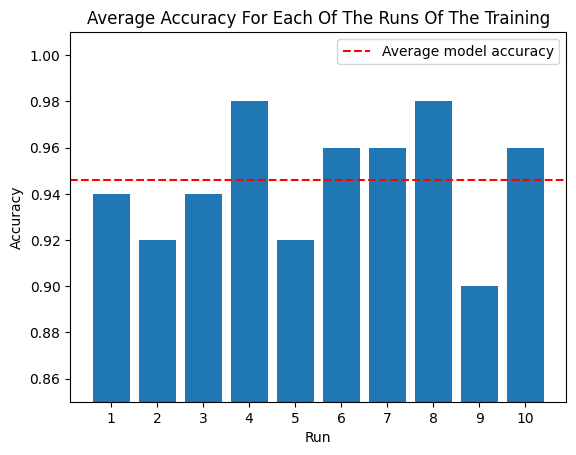

The total average accuracy of the model during these 10 runs is: 0.946


In [32]:
tp = 0
tn = 0
n=10
total_accuracy = []

for i in range(n):
    training_data, test_data = get_training_and_test_data()
    tp = 0
    tn = 0
    
    # Classify test_data using the training_data (not the full set), using k nearest neighbor with
    # k being an odd number to always get correct class
    for j, td in enumerate(test_data):
        result = k_nearest_neighbor(td,training_data,11)
        # Compare result to actual class
        if result == "Pikachu" and td[2] == 1:
            tp+=1
        if result == "Pichu" and td[2] == 0:
            tn+=1
    run_accuracy = float((tp + tn))/float(len(test_data))
    total_accuracy.append(run_accuracy)

plt.title("Average accuracy for each of the runs of the training".title())
plt.ylim(0.85, 1.01)
plt.xlabel("Run")
plt.ylabel("Accuracy")
plt.axhline(y=sum(total_accuracy)/len(total_accuracy), color='r', linestyle='--', label='Average model accuracy')
plt.legend()
plt.xticks(range(n+1))
plt.bar(range(1,11),total_accuracy)
plt.show()
        
print(f"The total average accuracy of the model during these {n} runs is: {sum(total_accuracy)/len(total_accuracy):.3}")